In [2]:
cd ~/MultiFidelity-ProcessOpt/Perovskites/

/cephfs/volumes/hpc_home/k23070952/a774a32b-b8f8-42f8-b661-406a5dd49fd8/MultiFidelity-ProcessOpt/Perovskites


In [112]:
import pickle
import itertools
import numpy as np
import matplotlib.pyplot as plt


LOOKUP = pickle.load(open('0.Data/lookup_table.pkl', 'rb'))

# options 정의 (이미 위에서 리스트로 보여주셨으니 그대로 사용)
organic_options = ['ethylammonium', 'propylammonium', 'butylammonium', 'isopropylammonium', 'dimethylammonium', 'acetamidinium', 'methylammonium', 'guanidinium', 'hydroxylammonium', 'formamidinium', 'tetramethylammonium', 'hydrazinium', 'ammonium', 'trimethylammonium', 'azetidinium', 'imidazolium']
cation_options = ['Ge', 'Sn', 'Pb']
anion_options = ['F', 'Cl', 'Br', 'I']

# 전체 경우의 수 bandgap_hse06 값 추출
all_results = []

for organic in organic_options:
    for cation in cation_options:
        for anion in anion_options:
            try:
                bandgap = np.amin(
                    LOOKUP[organic.capitalize()][cation][anion]['bandgap_gga']
                )
                all_results.append({
                    'organic': organic,
                    'cation': cation,
                    'anion': anion,
                    'bandgap': bandgap
                })
            except Exception as e:
                print(f"Skip: {organic}-{cation}-{anion} ({e})")
                continue

import pandas as pd
df = pd.DataFrame(all_results)
df

,organic,cation,anion,bandgap
0,ethylammonium,Ge,F,4.1048
1,ethylammonium,Ge,Cl,2.2048
2,ethylammonium,Ge,Br,1.8833
3,ethylammonium,Ge,I,1.4809
4,ethylammonium,Sn,F,2.8524
...,...,...,...,...
187,imidazolium,Sn,I,1.3734
188,imidazolium,Pb,F,3.2919
189,imidazolium,Pb,Cl,2.5692
190,imidazolium,Pb,Br,2.0313


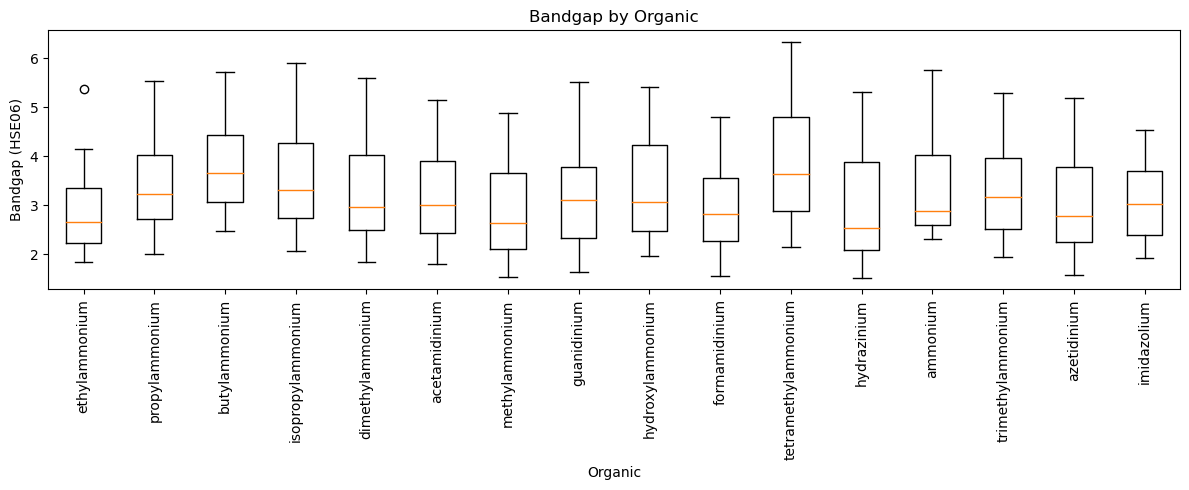

In [10]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.boxplot([df[df['organic'] == org]['bandgap'] for org in organic_options], labels=organic_options)
plt.xlabel('Organic')
plt.ylabel('Bandgap (HSE06)')
plt.title('Bandgap by Organic')
plt.tight_layout()
plt.show()


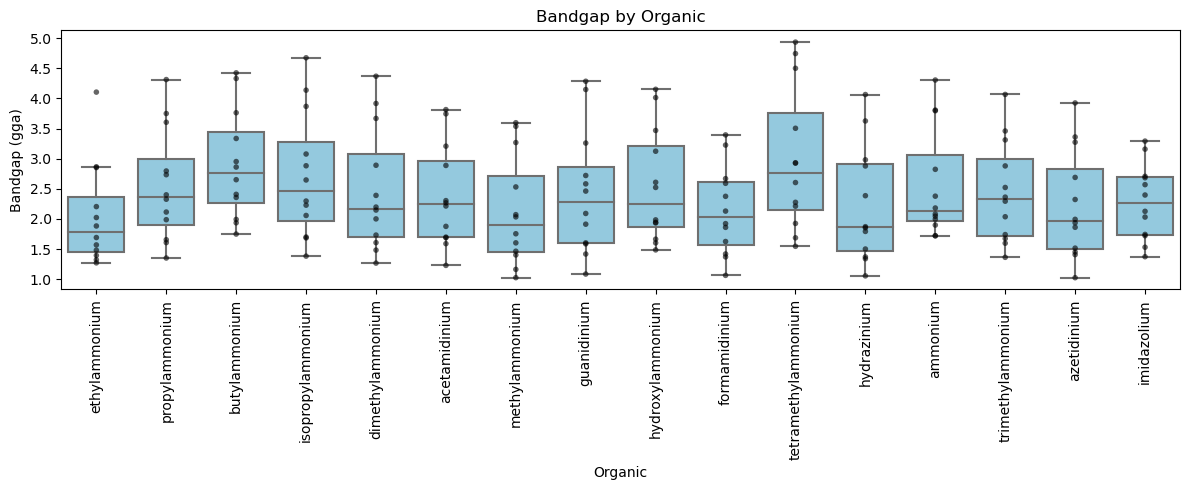

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# 1. 박스플롯 (배경)
sns.boxplot(data=df, x='organic', y='bandgap', color='skyblue', showfliers=False)

# 2. 점(실제 데이터) 덧씌우기
sns.stripplot(data=df, x='organic', y='bandgap', color='k', alpha=0.6, jitter=0., size=4)

plt.xticks(rotation=90)
plt.xlabel('Organic')
plt.ylabel('Bandgap (gga)')
plt.title('Bandgap by Organic')
plt.tight_layout()
plt.show()


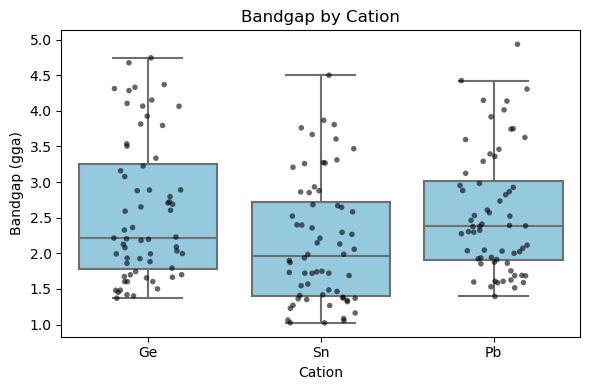

In [115]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cation', y='bandgap', color='skyblue', showfliers=False)
sns.stripplot(data=df, x='cation', y='bandgap', color='k', alpha=0.6, jitter=0.2, size=4)
plt.xlabel('Cation')
plt.ylabel('Bandgap (gga)')
plt.title('Bandgap by Cation')
plt.tight_layout()
plt.show()


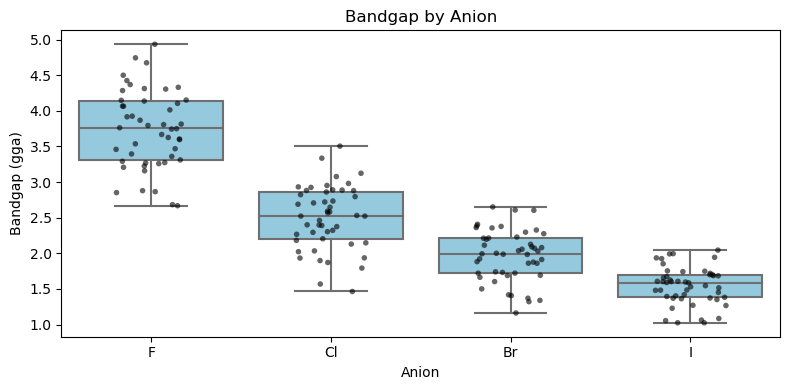

In [116]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='anion', y='bandgap', color='skyblue', showfliers=False)
sns.stripplot(data=df, x='anion', y='bandgap', color='k', alpha=0.6, jitter=0.2, size=4)
plt.xlabel('Anion')
plt.ylabel('Bandgap (gga)')
plt.title('Bandgap by Anion')
plt.tight_layout()
plt.show()


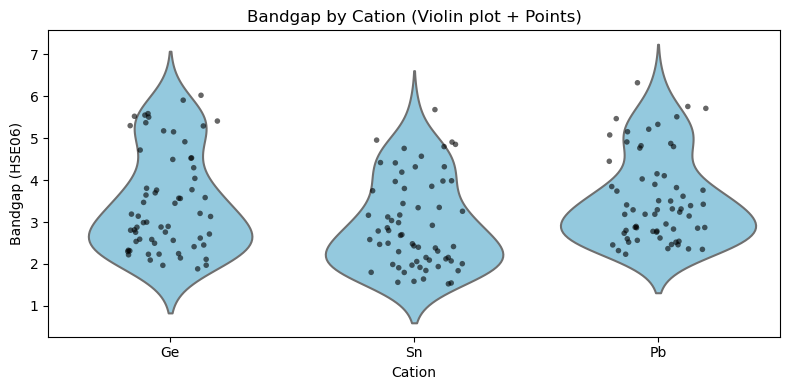

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
# 바이올린 플롯: 분포의 모양(커널 밀도) 시각화
sns.violinplot(data=df, x='cation', y='bandgap', inner=None, color='skyblue')

# 실제 데이터 점 덧씌우기
sns.stripplot(data=df, x='cation', y='bandgap', color='k', alpha=0.6, jitter=0.2, size=4)

plt.xlabel('Cation')
plt.ylabel('Bandgap (HSE06)')
plt.title('Bandgap by Cation (Violin plot + Points)')
plt.tight_layout()
plt.show()


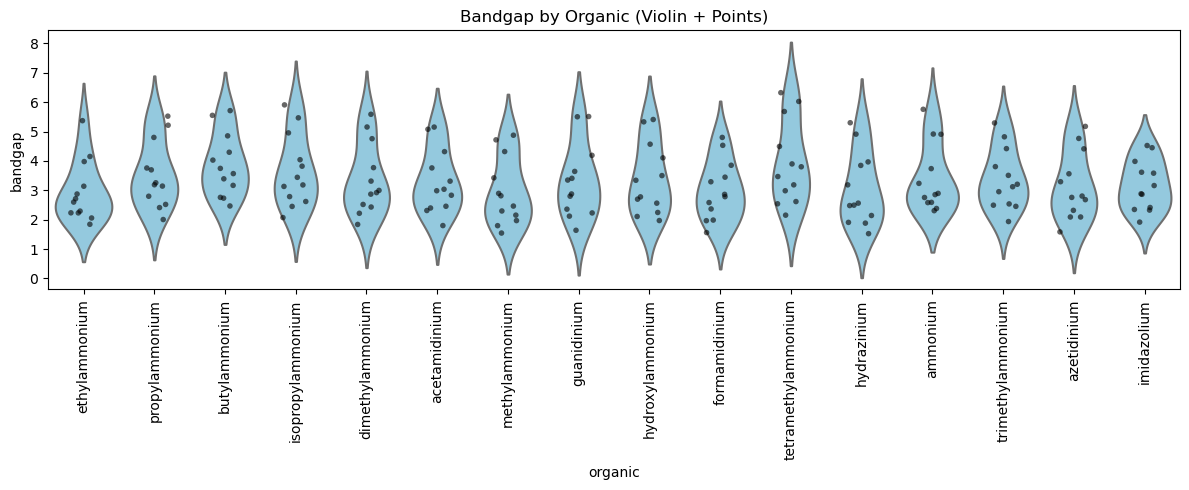

In [26]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='organic', y='bandgap', inner=None, color='skyblue')
sns.stripplot(data=df, x='organic', y='bandgap', color='k', alpha=0.6, jitter=0.2, size=4)
plt.xticks(rotation=90)
plt.title('Bandgap by Organic (Violin + Points)')
plt.tight_layout()
plt.show()


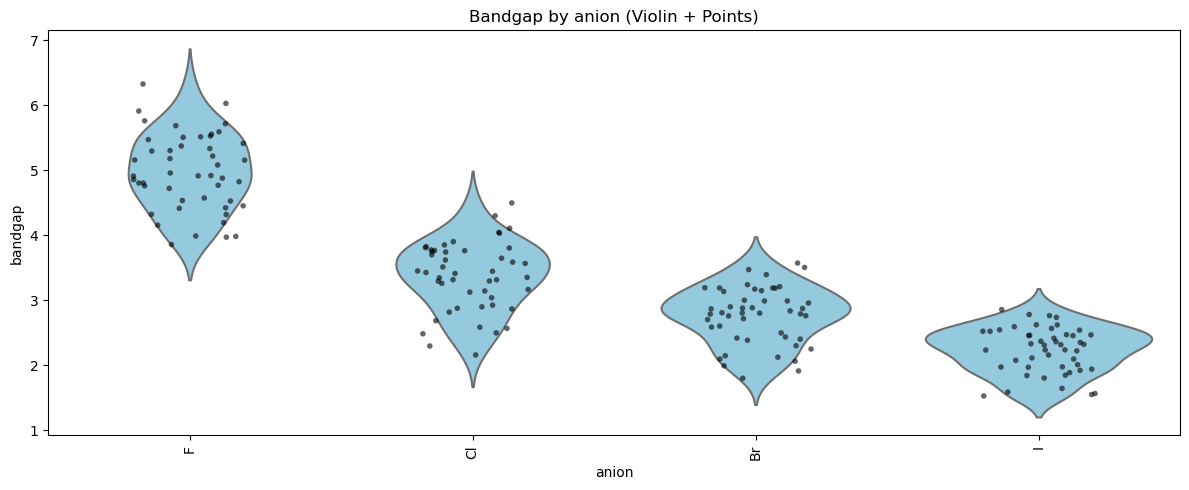

In [30]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='anion', y='bandgap', inner=None, color='skyblue')
sns.stripplot(data=df, x='anion', y='bandgap', color='k', alpha=0.6, jitter=0.2, size=4)
plt.xticks(rotation=90)
plt.title('Bandgap by anion (Violin + Points)')
plt.tight_layout()
plt.show()


In [39]:
for row in timing_data.values:
    print(row)

[ 0.          1.         52.81600499]
[ 0.          2.         50.60899973]
[ 0.          3.         51.03280759]
[ 0.          4.         51.71987605]
[ 0.          5.         51.76685524]
[ 0.          6.         51.63587713]
[ 0.          7.         51.75952125]
[ 0.          8.         51.40665269]
[ 0.          9.         51.68403435]
[ 0.         10.         51.51664734]


In [37]:
timing_data

,run_ix,iter,time_taken
0,0,1,52.816005
1,0,2,50.609000
2,0,3,51.032808
3,0,4,51.719876
4,0,5,51.766855
5,0,6,51.635877
6,0,7,51.759521
7,0,8,51.406653
8,0,9,51.684034
9,0,10,51.516647


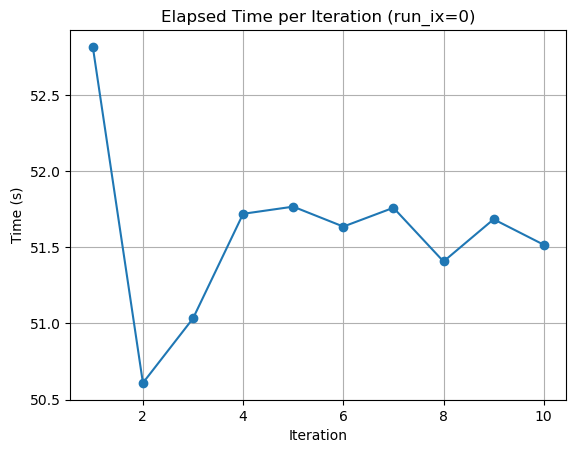

In [40]:
import matplotlib.pyplot as plt

timing_data = pd.read_csv('TL_timing_results.csv')
# 첫번째 컬럼이 0인 것만 추출
filtered = [row for row in timing_data.values if row[0] == 0]

# 두번째 컬럼(x축), 세번째 컬럼(y축) 추출
x = [row[1] for row in filtered]
y = [row[2] for row in filtered]

plt.plot(x, y, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Time (s)')
plt.title('Elapsed Time per Iteration (run_ix=0)')
plt.grid(True)
plt.show()

In [53]:
x1

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0]

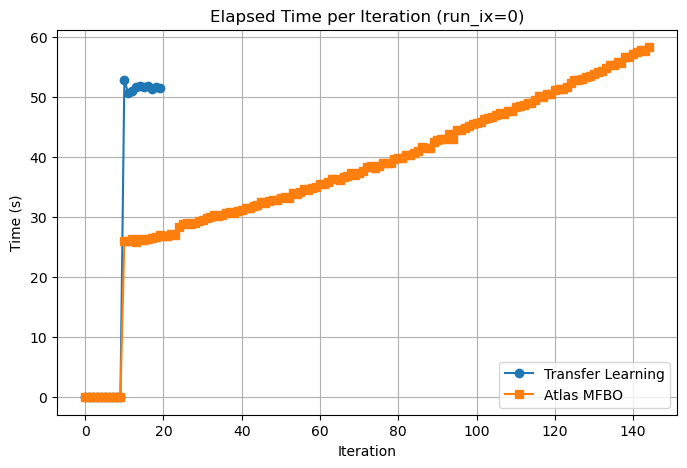

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# TL 데이터 불러오기
timing_data_1 = pd.read_csv('TL_timing_results.csv')
filtered_1 = [row for row in timing_data_1.values if row[0] == 0]
x1 = [row[1] for row in filtered_1]
y1 = [row[2] for row in filtered_1]

# 앞에 10개의 0값 추가 (x: 0~9, y: 0)
N_INIT = 10  # 원하는 만큼 조정
x1 = list(range(0, 20))
y1 = [0.0]*N_INIT + y1

# MF 데이터 불러오기 (동일)
timing_data_2 = pd.read_csv('timing_results.csv')
filtered_2 = [row for row in timing_data_2.values if row[0] == 0]
x2 = [row[1] for row in filtered_2]
y2 = [row[2] for row in filtered_2]

plt.figure(figsize=(8,5))
plt.plot(x1, y1, marker='o', label='Transfer Learning')
plt.plot(x2, y2, marker='s', label='Atlas MFBO')
plt.xlabel('Iteration')
plt.ylabel('Time (s)')
plt.title('Elapsed Time per Iteration (run_ix=0)')
plt.grid(True)
plt.legend()
plt.show()



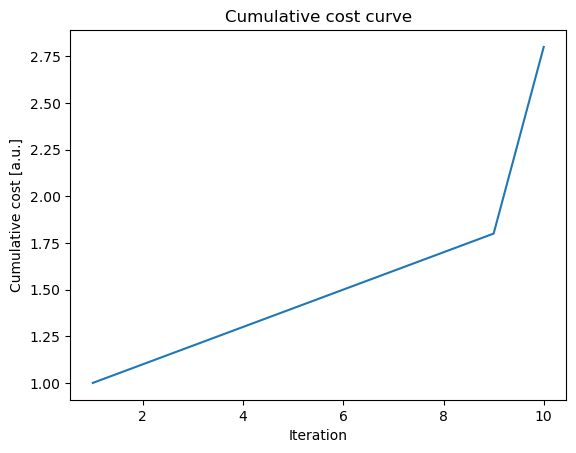

In [56]:
import matplotlib.pyplot as plt

cost_df = pd.read_csv('TL_cumulative_cost.csv')
plt.plot(cost_df['iter'], cost_df['cumulative_cost'])
plt.xlabel('Iteration')
plt.ylabel('Cumulative cost [a.u.]')
plt.title('Cumulative cost curve')
plt.show()


In [78]:
import pandas as pd

df_labels = pd.read_csv('X_full_with_labels.csv')
df_results = pd.read_csv('TL_all_iter_results.csv')
# iter==1 예시 (필요한 iter로 조정)
target_iter = 1
row_iter = df_results[df_results['iter'] == target_iter].iloc[0]
y_pred_full = eval(row_iter['y_pred_full'])  # 문자열 → 리스트로 변환 (주의: eval 안전하게!)
df_labels['bandgap_pred'] = y_pred_full
df_final = df_labels[['organic', 'cation', 'anion', 'bandgap_pred']]
df_final.to_csv('full_pred_bandgap_iter1.csv', index=False)


In [79]:
param_space = {
    "organic": [
        "ethylammonium", "propylammonium", "butylammonium", "isopropylammonium",
        "dimethylammonium", "acetamidinium", "methylammonium", "guanidinium",
        "hydroxylammonium", "formamidinium", "tetramethylammonium", "hydrazinium",
        "ammonium", "trimethylammonium", "azetidinium", "imidazolium"
    ],
    "cation": ["Ge", "Sn", "Pb"],
    "anion": ["F", "Cl", "Br", "I"]
}
label_maps = {
    key: {val: idx for idx, val in enumerate(vals, 1)}   # 1부터 시작하고 싶으면 enumerate(..., 1)
    for key, vals in param_space.items()
}
label_maps

{'organic': {'ethylammonium': 1,
  'propylammonium': 2,
  'butylammonium': 3,
  'isopropylammonium': 4,
  'dimethylammonium': 5,
  'acetamidinium': 6,
  'methylammonium': 7,
  'guanidinium': 8,
  'hydroxylammonium': 9,
  'formamidinium': 10,
  'tetramethylammonium': 11,
  'hydrazinium': 12,
  'ammonium': 13,
  'trimethylammonium': 14,
  'azetidinium': 15,
  'imidazolium': 16},
 'cation': {'Ge': 1, 'Sn': 2, 'Pb': 3},
 'anion': {'F': 1, 'Cl': 2, 'Br': 3, 'I': 4}}

In [88]:
train_set

{('acetamidinium', 'Ge', 'I'),
 ('ammonium', 'Sn', 'Cl'),
 ('ammonium', 'Sn', 'F'),
 ('guanidinium', 'Ge', 'F'),
 ('guanidinium', 'Sn', 'I'),
 ('hydrazinium', 'Pb', 'Br'),
 ('hydroxylammonium', 'Ge', 'F'),
 ('propylammonium', 'Pb', 'Br'),
 ('propylammonium', 'Pb', 'F'),
 ('propylammonium', 'Sn', 'I'),
 ('trimethylammonium', 'Sn', 'Br'),
 ('trimethylammonium', 'Sn', 'Cl')}

/tmp/ipykernel_104599/601811379.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['is_train'] = df_final.apply(


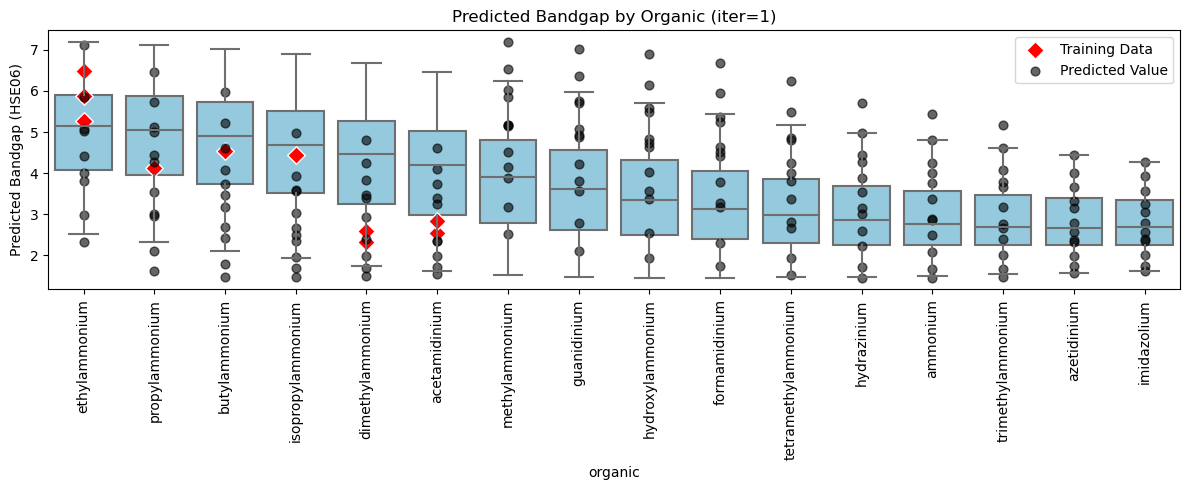

In [109]:
import pandas as pd
import numpy as np

# 1. 결과 파일에서 원하는 iter 행 추출
target_iter = 10
row_iter = df_results[df_results['iter'] == 1].iloc[0]

# 2. 리스트로 변환 (eval 사용)
ini_X_low = np.array(eval(row_iter['ini_X_low']))
ini_X_high = np.array(eval(row_iter['ini_X_high']))

# 3. reverse_label_maps 정의
reverse_label_maps = {
    key: {v: k for k, v in value.items()}
    for key, value in label_maps.items()
}

def label_arr_to_names(label_arr, reverse_label_maps):
    """label array (N,3) → [(organic, cation, anion), ...] (실제명)"""
    return [
        (
            reverse_label_maps['organic'][int(row[0])],
            reverse_label_maps['cation'][int(row[1])],
            reverse_label_maps['anion'][int(row[2])]
        )
        for row in label_arr
    ]

# 4. 학습 데이터 실제명 튜플 집합 생성
train_set = set(label_arr_to_names(ini_X_low, reverse_label_maps) + 
                label_arr_to_names(ini_X_high, reverse_label_maps))

# 5. df_final에서 is_train 컬럼 생성
df_final['is_train'] = df_final.apply(
    lambda r: (r['organic'], r['cation'], r['anion']) in train_set,
    axis=1
)

# 6. 시각화 예시 (이전 코드 참고)
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_final, x='organic', y='bandgap_pred', color='skyblue', showfliers=False)

# scatter를 직접 그려서 legend 컨트롤
ax = plt.gca()
# 학습 데이터
ax.scatter(
    x=df_final[df_final['is_train']]['organic'],
    y=df_final[df_final['is_train']]['bandgap_pred'],
    color='red', s=80, label='Training Data', marker='D', edgecolors='white', linewidths=1
)
# 예측 데이터 (학습 제외)
ax.scatter(
    x=df_final[~df_final['is_train']]['organic'],
    y=df_final[~df_final['is_train']]['bandgap_pred'],
    color='k', alpha=0.6, s=40, label='Predicted Value'
)

plt.xticks(rotation=90)
plt.xlabel('organic')
plt.ylabel('Predicted Bandgap (HSE06)')
plt.title('Predicted Bandgap by Organic (iter=1)')
plt.legend()  # 자동으로 두 개만 나옴
plt.tight_layout()
plt.show()


In [92]:
df_final

,organic,cation,anion,bandgap_pred,is_train
0,ethylammonium,Ge,F,2.509842,False
1,ethylammonium,Ge,Cl,3.174220,False
2,ethylammonium,Ge,Br,4.138428,False
3,ethylammonium,Ge,I,5.148516,False
4,ethylammonium,Sn,F,3.884976,False
...,...,...,...,...,...
187,imidazolium,Sn,I,3.056160,False
188,imidazolium,Pb,F,3.262482,False
189,imidazolium,Pb,Cl,3.558208,False
190,imidazolium,Pb,Br,3.920594,False


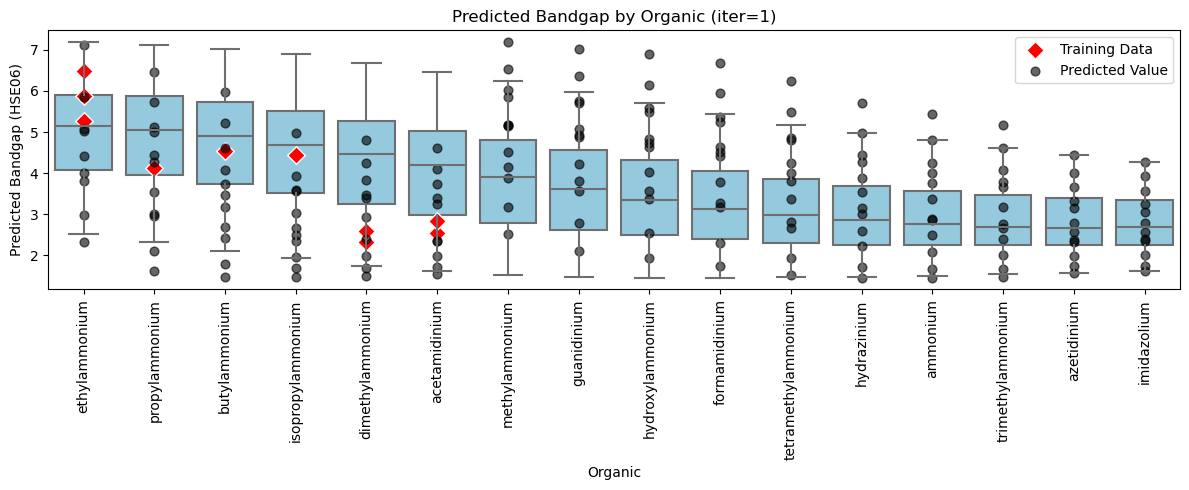

In [90]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_final, x='organic', y='bandgap_pred', color='skyblue', showfliers=False)

# scatter를 직접 그려서 legend 컨트롤
ax = plt.gca()
# 학습 데이터
ax.scatter(
    x=df_final[df_final['is_train']]['organic'],
    y=df_final[df_final['is_train']]['bandgap_pred'],
    color='red', s=80, label='Training Data', marker='D', edgecolors='white', linewidths=1
)
# 예측 데이터 (학습 제외)
ax.scatter(
    x=df_final[~df_final['is_train']]['organic'],
    y=df_final[~df_final['is_train']]['bandgap_pred'],
    color='k', alpha=0.6, s=40, label='Predicted Value'
)

plt.xticks(rotation=90)
plt.xlabel('Organic')
plt.ylabel('Predicted Bandgap (HSE06)')
plt.title('Predicted Bandgap by Organic (iter=1)')
plt.legend()  # 자동으로 두 개만 나옴
plt.tight_layout()
plt.show()

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 학습에 활용된 모든 (organic, cation, anion) label tuple 집합 만들기
def label2name(row, reverse_label_maps):
    o = reverse_label_maps['organic'][int(row[0])]
    c = reverse_label_maps['cation'][int(row[1])]
    a = reverse_label_maps['anion'][int(row[2])]
    return (o, c, a)

# reverse_label_maps 정의 필요 (이전 답변 참고)
# ini_X_low, ini_X_high: (N,3) array, 값은 label
import numpy as np
all_train_set = set()
for arr in [ini_X_low, ini_X_high]:
    if arr is not None and len(arr):
        for row in arr:
            # label 값으로 → name 변환
            all_train_set.add(label2name(row, reverse_label_maps))

# 2. df_final에 is_train 컬럼 추가
df_final['is_train'] = df_final.apply(
    lambda r: (r['organic'], r['cation'], r['anion']) in all_train_set, axis=1
)

# 3. 시각화
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_final, x='organic', y='bandgap_pred', color='skyblue', showfliers=False)

# 학습 데이터(빨간색)
sns.stripplot(data=df_final[df_final['is_train']], x='organic', y='bandgap_pred', 
              color='red', size=8, jitter=0., label='Training', marker='D', edgecolor='white', linewidth=1)

# 나머지(예측 데이터, 검정색)
sns.stripplot(data=df_final[~df_final['is_train']], x='organic', y='bandgap_pred',
              color='k', alpha=0.6, size=4, jitter=0., label='Predicted')

plt.xticks(rotation=90)
plt.xlabel('Organic')
plt.ylabel('Predicted Bandgap (HSE06)')
plt.title('Predicted Bandgap by Organic (iter=1)')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'ini_X_low' is not defined